# Exercise 1. Linear Regression 

*   High Level API를 사용하지 않고 forward, back propagation을 구현한다



In [0]:
import sys
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')
# Set the seed for reproducability
np.random.seed(seed=13)

### 1. Toy dataset 생성

In [0]:
# Define the vector of input samples as x, with 20 values 
# sampled from a uniform distribution between 0 and 1
x = np.random.uniform(0, 1, 50)

# Generate the target values t from x with small gaussian noise 
def f(x): 
    return 3 * x - 0.5

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = np.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

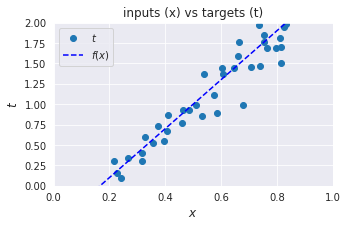

In [0]:
# Plot the target t versus the input x
plt.figure(figsize=(5, 3))
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.axis((0, 1, 0, 2))
plt.title('inputs (x) vs targets (t)')
plt.legend(loc=2)
plt.show()

### 2. Forward 함수 및 Loss Function 정의

In [0]:
def forward(x, w, b):
  "Output function y = x * w + b"
  return x * w + b
  
def loss(y, t):
  "MSE loss function"
  return np.mean((t-y)**2)

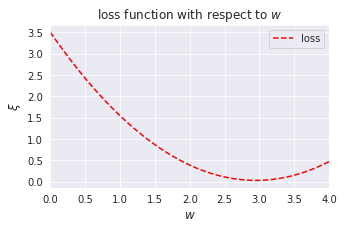

In [0]:
# Plot the loss vs the given weight w

# Vector of weights for which we want to plot the loss
ws = np.linspace(0, 4, num=100)  # weight values
# loss for each weight in ws
loss_ws = np.vectorize(lambda w: loss(forward(x, w, -0.5) , t))(ws)

# Plot
plt.figure(figsize=(5, 3))
plt.plot(ws, loss_ws, 'r--', label='loss')
plt.xlabel('$w$', fontsize=12)
plt.ylabel('$\\xi$', fontsize=12)
plt.title('loss function with respect to $w$')
plt.xlim(0, 4)
plt.legend()
plt.show()
#

### 3. Gradient 및 Backward 함수 정의

In [0]:
def gradient(w, b, x, t):
    """Gradient function. x : input, w: weight, b: bias, t: true label"""
    y = forward(x,w,b)
    grad_w = 0
    grad_b = 0
    
    ###################
    # TODO: grad_w와 grad_b를 계산하는 코드를 여기에 작성하세요.
    # ...

    ###################
    
    return grad_w, grad_b

### 4. Training

In [0]:
# Initial weight parameter
w = np.random.rand()
b = np.random.rand()
# Set the learning rate
learning_rate = 0.7

# Perform the gradient descent updates, and print the weights and loss:
nb_of_iterations = 100  # number of gradient descent updates
_loss = [(w, b, loss(forward(x, w, b), t))] # Keep track of weight and loss values
for i in range(nb_of_iterations):
  
    ###################
    # TODO: gradient() 함수를 사용하여 w와 b를 업데이트하는 코드를 여기에 작성하세요.
    # ...

    ###################
    
    _loss.append((w, b, loss(forward(x, w, b), t)))  # Save weight and loss

# Print the final w, and loss
for i in range(0, len(_loss)):
    print(f'w({i}): {_loss[i][0]:.4f} \t b({i}): {_loss[i][1]:.4f} \t loss: {_loss[i][1]:.4f}')

w(0): 0.9218 	 b(0): 0.6781 	 loss: 0.6781
w(1): 1.1101 	 b(1): 0.6550 	 loss: 0.6550
w(2): 1.2115 	 b(2): 0.5130 	 loss: 0.5130
w(3): 1.3702 	 b(3): 0.4884 	 loss: 0.4884
w(4): 1.4597 	 b(4): 0.3708 	 loss: 0.3708
w(5): 1.5936 	 b(5): 0.3459 	 loss: 0.3459
w(6): 1.6725 	 b(6): 0.2484 	 loss: 0.2484
w(7): 1.7855 	 b(7): 0.2241 	 loss: 0.2241
w(8): 1.8548 	 b(8): 0.1430 	 loss: 0.1430
w(9): 1.9503 	 b(9): 0.1198 	 loss: 0.1198
w(10): 2.0110 	 b(10): 0.0524 	 loss: 0.0524
w(11): 2.0919 	 b(11): 0.0306 	 loss: 0.0306
w(12): 2.1449 	 b(12): -0.0256 	 loss: -0.0256
w(13): 2.2134 	 b(13): -0.0457 	 loss: -0.0457
w(14): 2.2597 	 b(14): -0.0927 	 loss: -0.0927
w(15): 2.3178 	 b(15): -0.1111 	 loss: -0.1111
w(16): 2.3582 	 b(16): -0.1504 	 loss: -0.1504
w(17): 2.4075 	 b(17): -0.1671 	 loss: -0.1671
w(18): 2.4426 	 b(18): -0.2000 	 loss: -0.2000
w(19): 2.4844 	 b(19): -0.2150 	 loss: -0.2150
w(20): 2.5149 	 b(20): -0.2426 	 loss: -0.2426
w(21): 2.5505 	 b(21): -0.2561 	 loss: -0.2561
w(22): 2.5

### 실험 결과 plotting

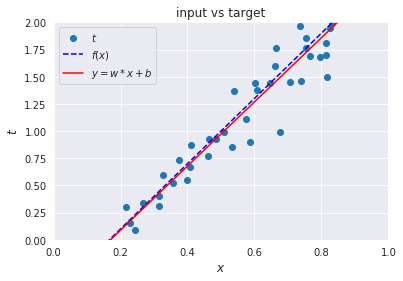

In [0]:
# Plot the fitted line agains the target line
plt.figure(figsize=(6, 4))
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='$t$')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b--', label='$f(x)$')
# plot the fitted line
plt.plot([0, 1], [0*w + b, 1*w + b], 'r-', label='$y = w * x + b$')
plt.xlabel('$x$', fontsize=12)
plt.ylabel('$t$', fontsize=12)
plt.title('input vs target')
plt.legend(loc=2)
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.show()
#